<a href="https://colab.research.google.com/github/tutur90/Weather-Forecast/blob/main/Map_forcast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd

df = pd.read_csv('mapdata.csv', header=[0,1])


new_columns = []
current_name = ''

for col in df.columns:
    if 'Unnamed' not in col[0]:
        current_name = col[0]
    new_columns.append((current_name, col[1]))

df.columns = pd.MultiIndex.from_tuples(new_columns)
df.to_csv("mapdata_processed.csv", index=False)


df

T_AVG_EH                                   \
          CoordX_SM   CoordY_SM  1990-1994  1995-1999  2000-2004  2005-2009   
0        500238.433  9757716.35  26.241653  26.431744  26.205169  25.623458   
1        501238.433  9756716.35  26.276430  26.472976  26.248354  25.640990   
2        501238.433  9757716.35  26.250309  26.445153  26.217235  25.670272   
3        502238.433  9755716.35  26.298148  26.500389  26.276984  25.684519   
4        502238.433  9756716.35  26.296136  26.498092  26.272711  25.661937   
...             ...         ...        ...        ...        ...        ...   
247874  1145238.433  9892716.35  25.233935  25.372867  25.568853  25.320505   
247875  1145238.433  9893716.35  25.233274  25.370885  25.567556  25.317194   
247876  1146238.433  9891716.35  25.250690  25.392907  25.587620  25.329543   
247877  1146238.433  9892716.35  25.246185  25.386656  25.582197  25.325857   
247878  1147238.433  9891716.35  25.252752  25.395376  25.590020  25.333612   

                    T_AVG_ES                        ...   T_MIN_EH             \
        2010-2013  1990-1994  1995-1999  2000-2004  ...  1990-1994  1995-1999   
0       25.500149  23.211798  24.921022  24.136960  ...  22.750114  20.888282   
1       25.518365  23.216478  24.946658  24.158758  ...  21.400455  20.931939   
2       25.504583  23.234939  24.930630  24.147188  ...  21.603656  20.914635   
3       25.562800  23.233070  24.963670  24.173251  ...  21.458458  20.963566   
4       25.540316  23.227812  24.963483  24.168645  ...  21.813207  20.968519   
...           ...        ...        ...        ...  ...        ...        ...   
247874  25.266802  25.990606  26.455063  25.850696  ...        NaN  22.128786   
247875  25.264276  25.988053  26.452401  25.846256  ...        NaN  22.127190   
247876  25.276539  25.999149  26.478185  25.861416  ...        NaN  22.159800   
247877  25.273676  25.996260  26.471587  25.857181  ...        NaN  22.152486   
247878  25.281513  26.003556  26.484082  25.863806  ...        NaN  22.168329   

                                          T_MIN_ES                        \
        2000-2004  2005-2009  2010-2013  1990-1994  1995-1999  2000-2004   
0       21.299084  21.074153  20.003842  18.715838  18.442846  17.972751   
1       21.344305  21.115768  20.045958  18.743299  18.475342  18.006228   
2       21.319373  21.094308  20.030165  18.731016  18.466860  17.996674   
3       21.377115  21.145678  20.076691  18.761481  18.500737  18.031218   
4       21.375084  21.145874  20.082033  18.766453  18.505476  18.029859   
...           ...        ...        ...        ...        ...        ...   
247874  22.451011  22.255762  22.053887  22.120722  22.236774  21.860308   
247875  22.449209  22.252206  22.052055  22.120092  22.235370  21.855847   
247876  22.477580  22.283775  22.083396  22.139136  22.269439  21.870969   
247877  22.470855  22.274527  22.074675  22.133741  22.260817  21.866744   
247878  22.484293  22.287406  22.086036  22.139492  22.274447  21.872403   

                              
        2005-2009  2010-2013  
0       19.400676  17.865228  
1       19.436622  17.895014  
2       19.418912  17.885806  
3       19.460895  17.914714  
4       19.464830  17.924371  
...           ...        ...  
247874  22.234442  22.303246  
247875  22.232973  22.300377  
247876  22.255846  22.333695  
247877  22.249586  22.323537  
247878  22.258210  22.334771  

[247879 rows x 32 columns]

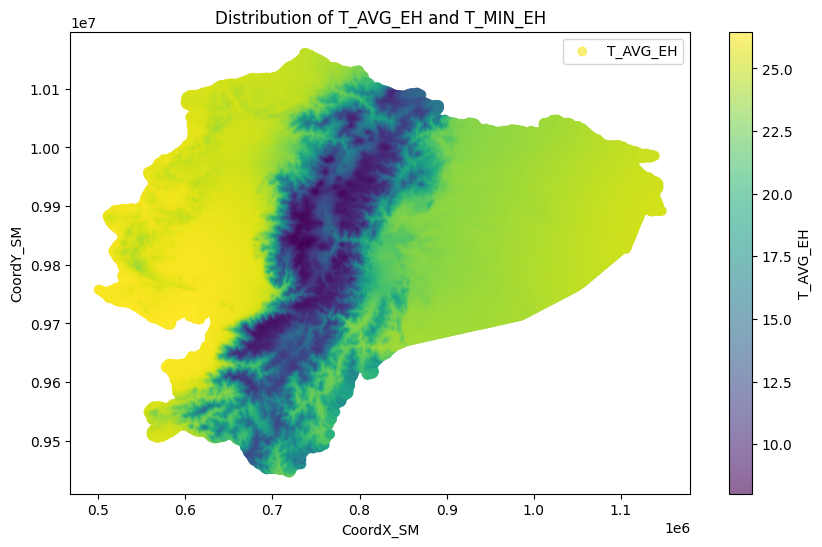

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Tracer T_AVG_EH
plt.scatter(df[('', 'CoordX_SM')], df[('','CoordY_SM')], c=df[('T_AVG_EH','1990-1994')], cmap='viridis', label='T_AVG_EH', alpha=0.6)
plt.colorbar(label='T_AVG_EH')

plt.xlabel('CoordX_SM')
plt.ylabel('CoordY_SM')
plt.legend()
plt.title('Distribution of T_AVG_EH and T_MIN_EH')
plt.show()

In [26]:
l = []
for c in df.columns:
  if c[0] not in l and c[0] != '':

    l.append(c[0])
l

['T_AVG_EH', 'T_AVG_ES', 'T_MAX_EH', 'T_MAX_ES', 'T_MIN_EH', 'T_MIN_ES']

In [ ]:
for c in l:
  print()